In [2]:
%load_ext lab_black

In [3]:
from diviner import calib
from diviner import file_utils as fu
from diviner import plot_utils as pu
import pandas as pd

In [5]:
plt.rcParams["figure.figsize"] = (14, 10)

In [8]:
fu.L1ADataPump?

Init signature: fu.L1ADataPump(tstr)
Docstring:     
Abstract Class to stream div38 or div247 data.

Needs to be completed in derived class.
Things missing is self.datapath to be set in deriving class.
Init docstring:
tstr is of format yyyymm[dd[hh]], used directly by glob.

This means, less files are found if the tstr is longer, as it
is then more restrictive.
File:           ~/Dropbox/src/diviner/diviner/file_utils.py
Type:           type
Subclasses:     


In [6]:
pump = fu.Div247DataPump('20110401')

No files found. Searched like this:

/Users/maye/data/diviner/div247/201104/20110401*


IndexError: list index out of range

In [116]:
df = pump.get_n_hours_from_t(3,0)

2011040100.div247
2011040101.div247
2011040102.div247


In [10]:
pump = fu.L1ADataPump("2010010100")

In [12]:
df = pump.get_n_hours_from_t(2)

2010010100_L1A.TAB
2010010101_L1A.TAB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56256 entries, 2010-01-01 00:00:00.290000 to 2010-01-01 02:00:01.102000
Columns: 257 entries, q to is_calib
dtypes: bool(6), float64(50), int32(4), int64(193), object(4)
memory usage: 107.6+ MB


In [15]:
c = calib.Calibrator(df, do_rad_corr=False)

In [16]:
c.calibrate()

In [17]:
det = "a6_11"

In [18]:
c.offsets[det]

2010-01-01 00:03:06.599000    26339.171875
2010-01-01 00:13:23.064000    26338.929688
2010-01-01 00:23:39.528000    26338.117188
2010-01-01 00:33:55.989000    26337.117188
2010-01-01 00:44:12.449000    26336.515625
2010-01-01 00:54:49.390500    26336.484375
2010-01-01 01:04:45.377500    26335.960938
2010-01-01 01:15:01.840000    26335.718750
2010-01-01 01:30:31.653000    26334.898438
2010-01-01 01:40:48.115000    26335.023438
2010-01-01 01:51:25.058000    26334.960938
2010-01-01 01:55:08.294500    26335.023438
Name: a6_11, dtype: float64

In [19]:
c.gains[det]

2010-01-01 00:03:06.599000   -0.000291
2010-01-01 00:13:23.064000   -0.000291
2010-01-01 00:23:39.528000   -0.000291
2010-01-01 00:33:55.989000   -0.000291
2010-01-01 00:44:12.449000   -0.000291
2010-01-01 00:54:49.390500   -0.000291
2010-01-01 01:04:45.377500   -0.000291
2010-01-01 01:15:01.840000   -0.000291
2010-01-01 01:30:31.653000   -0.000292
2010-01-01 01:40:48.115000   -0.000291
2010-01-01 01:51:25.058000   -0.000291
Name: a6_11, dtype: float64

In [20]:
Tb_standard = c.Tb[det]
gains_standard = c.gains_interp[det]
norm_rad_standard = c.norm_radiance[det]
abs_rad_standard = c.abs_radiance[det]

In [21]:
c.gains[det] = c.gains[det].mean()

In [22]:
c.gains[det]

2010-01-01 00:03:06.599000   -0.000291
2010-01-01 00:13:23.064000   -0.000291
2010-01-01 00:23:39.528000   -0.000291
2010-01-01 00:33:55.989000   -0.000291
2010-01-01 00:44:12.449000   -0.000291
2010-01-01 00:54:49.390500   -0.000291
2010-01-01 01:04:45.377500   -0.000291
2010-01-01 01:15:01.840000   -0.000291
2010-01-01 01:30:31.653000   -0.000291
2010-01-01 01:40:48.115000   -0.000291
2010-01-01 01:51:25.058000   -0.000291
Name: a6_11, dtype: float64

In [23]:
c.interpolate_caldata()
c.calc_radiances()
c.calc_tb()

In [24]:
Tb_mean_gain = c.Tb[det]
gains_mean = c.gains_interp[det]
norm_rad_mean = c.norm_radiance[det]
abs_rad_mean = c.abs_radiance[det]

/Users/klay6683/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


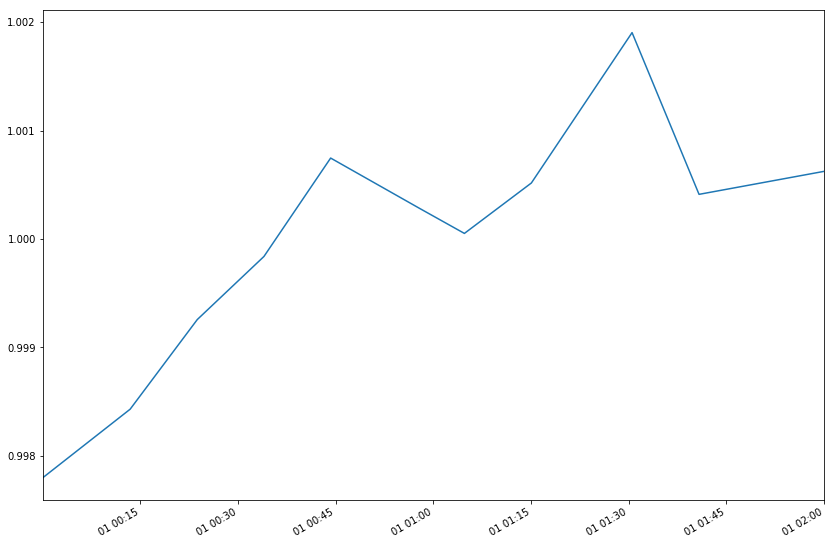

In [25]:
(abs_rad_standard / abs_rad_mean).plot()

Text(0.5, 0, 'Time [UTC]')

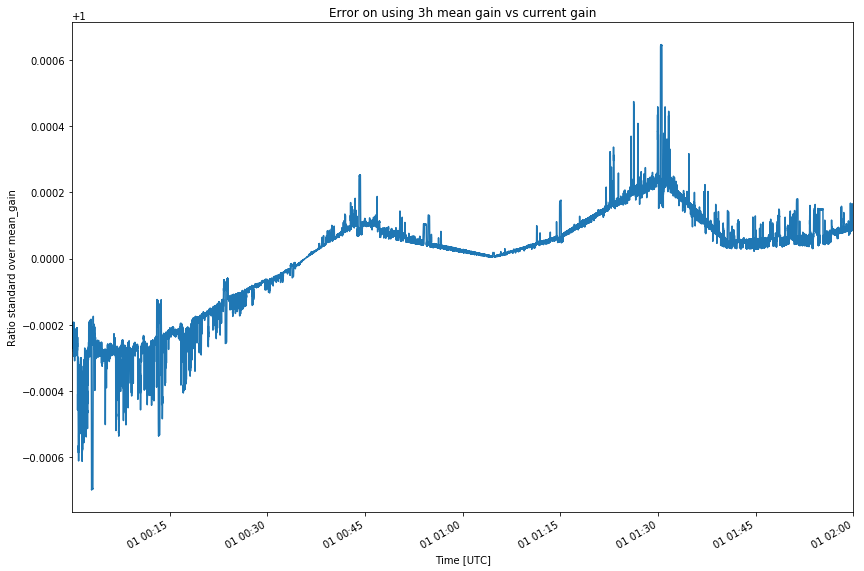

In [27]:
(Tb_standard / Tb_mean_gain).plot()
plt.title("Error on using 3h mean gain vs current gain")
plt.ylabel("Ratio standard over mean_gain")
plt.xlabel("Time [UTC]")

In [28]:
Tb_early_offset.plot(label='early_offset')
Tb_standard.plot(label='standard')
plt.legend(loc='best')
plt.ylabel('Tb [K]')
plt.xlabel('Time [UTC]')
plt.title("Early offset: Take first 16 samples only. Compare with skipping first 16")

NameError: name 'Tb_early_offset' is not defined

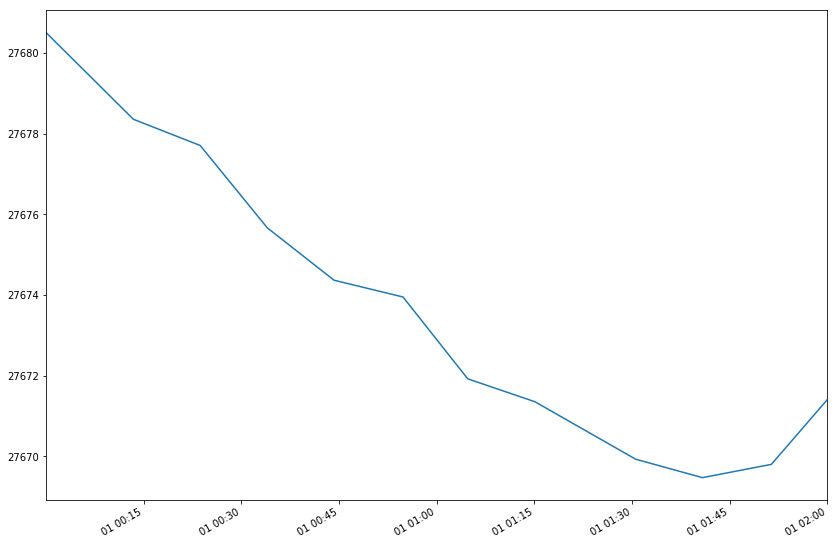

In [29]:
c.offsets_interp.b3_11.plot()

In [23]:
ctbout_all = c.Tb.ix[c.Tb.index.hour == 1]

In [24]:
tbout_all

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25724 entries, 2011-04-01 01:00:00.106000 to 2011-04-01 01:59:59.929000
Columns: 147 entries, a3_01 to b3_21
dtypes: float64(147)

In [25]:
tbout = tbout_all.filter(regex='b3_')

In [27]:
tbout.columns = range(21,0,-1)

In [29]:
tbout_all

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25724 entries, 2011-04-01 01:00:00.106000 to 2011-04-01 01:59:59.929000
Columns: 147 entries, a3_01 to b3_21
dtypes: float64(147)

In [11]:
df.bb_1_temp_interp.plot()

In [362]:
c.norm_radiance

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25328 entries, 2011-04-01 00:00:01.978000 to 2011-04-01 01:00:00.234000
Columns: 189 entries, a1_01 to b3_21
dtypes: float64(189)

In [363]:
radcorr = calib.RadianceCorrection()

In [ ]:
radcorr.convertR(

In [309]:
c.Tb.b3_11.resample('10s').plot()

In [349]:
caldata = c.df[c.df.is_calib]

In [282]:
grouped = caldata.groupby(df.calib_block_labels)

In [283]:
grouped.mean().b3_11

calib_block_labels
1                     27646.887500
2                     27635.258333
3                     27633.395833
4                     27636.595833
5                     27688.137500
6                     27651.375000
Name: b3_11, dtype: float64

In [284]:
def process_calblock(df):
    print type(df)
    cb = calib.CalBlock(df)
    print hasattr(df, 'sv_block_labels')
    if cb.kind == 'ST':
        return nan
    return cb.offsets

In [350]:
calblocks = calib.get_calib_block(caldata,'calib')

In [354]:
for df in calblocks.values():
    cb = calib.CalBlock(df)
    print cb.kind,cb.df.calib_block_labels.mean()
    if cb.kind == 'BOTH':
        pu.plot_calib_block(cb.df,'calib',cb.df.calib_block_labels.mean())

BB 1.0
BOTH 2.0
BB 3.0
BB 4.0
BB 5.0
BB 6.0
BB 7.0
BB 8.0
BB 9.0
BB 10.0
BB 11.0
BB 12.0
BB 13.0
BB 14.0
BB 15.0
BB 16.0
BB 17.0
BB 18.0
BOTH 19.0
BB 20.0
BB 21.0
BB 22.0
BB 23.0
BOTH 24.0
BB 25.0
BB 26.0
BB 27.0
BB 28.0
BB 29.0
BB 30.0


In [33]:
df1 = pd.DataFrame(range(10),columns=['a'])

In [34]:
df1

,a
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [36]:
dfdate = pd.DataFrame(range(20),columns=['b'])

In [39]:
df1['date'] = dfdate.b

In [40]:
df1

,a,date
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9
